In [1]:
import numpy as np
from scipy.spatial.transform import Rotation as R
import os
import glob
import random
import blendertoolbox as bt
import bpy
import os
import pdb
from mathutils import Quaternion, Vector, Matrix
import subprocess
from IPython import display
from vedo import dataurl, printc, Plotter, Points, Mesh, Text2D


In [3]:
def clean():
    for obj in bpy.data.objects:
        # Check if the object is a mesh
        if obj.type == 'MESH':
            # Select the mesh object
            obj.select_set(True)
        else:
            # Deselect other objects
            obj.select_set(False)
    bpy.ops.object.delete()

cycles rendering with: GPU
PLY import of 'Mouse_0083_Lhem_cFos_647_PV_488_Sagittal_s002_nl.ply' took 22.8 ms
PLY import of 'Mouse_0083_Lhem_cFos_647_PV_488_Sagittal_s003_nl.ply' took 13.4 ms
Fra:1 Mem:28.08M (Peak 28.08M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Mouse_0083_Lhem_cFos_647_PV_488_Sagittal_s002_nl
Fra:1 Mem:29.86M (Peak 29.86M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Plane
Fra:1 Mem:44.10M (Peak 46.49M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:43.73M (Peak 46.49M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:43.73M (Peak 46.49M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:43.73M (Peak 46.49M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:43.73M (Peak 46.49M) | Time

Fra:1 Mem:82.26M (Peak 90.26M) | Time:00:00.57 | Mem:47.95M, Peak:47.95M | Scene, ViewLayer | Sample 50/50
Fra:1 Mem:82.26M (Peak 90.26M) | Time:00:00.57 | Mem:47.95M, Peak:47.95M | Scene, ViewLayer | Finished
Saved: 'output.png'
Time: 00:00.60 (Saving: 00:00.02)



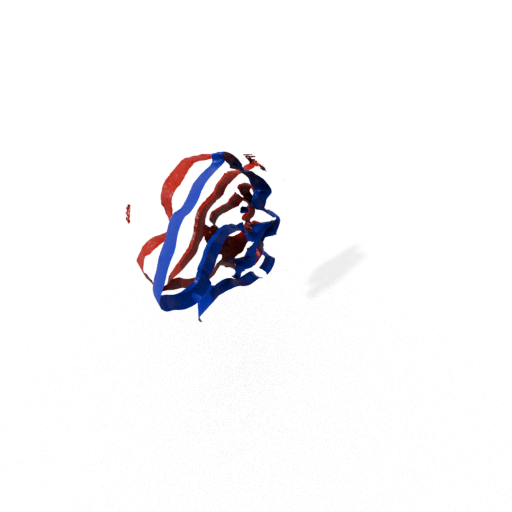

In [12]:
bt.blenderInit(
    512,
    512,
    50,
    1.5,
    True
)


#bpy.ops.mesh.primitive_cube_add(size=1,scale=(1,1,1))
#orig_cube = bpy.context.active_object
#print(type(orig_cube))





location = (0, 0, 0)
rotation = (0, 0, 0)
scale = (1, 1, 1)
#filepath = '/data/jhahn/data/shape_dataset/data/shape/vase/2_parts/fractured_0/piece_0.obj'
#bt.readOBJ(filepath, location, rotation, scale)
filepath = '/data/jhahn/data/shape_dataset/data/tg/0083/fractured_0/Mouse_0083_Lhem_cFos_647_PV_488_Sagittal_s002_nl.ply'
bt.readMesh(filepath, location, rotation, scale)
filepath = '/data/jhahn/data/shape_dataset/data/tg/0083/fractured_0/Mouse_0083_Lhem_cFos_647_PV_488_Sagittal_s003_nl.ply'
bt.readMesh(filepath, location, rotation, scale)

RED = np.append(np.array([255, 0, 0]  ) / 255.0, 1.0)
BLUE = np.append(np.array([0, 0, 255]  ) / 255.0, 1.0)
GREEN = np.append(np.array([0, 255, 0]  ) / 255.0, 1.0)


bt.setMat_plastic(bpy.context.collection.objects[0], bt.colorObj(RED))
bt.setMat_plastic(bpy.context.collection.objects[1], bt.colorObj(BLUE))
#bt.setMat_plastic(bpy.context.collection.objects[2], bt.colorObj(GREEN))




bpy.ops.object.shade_smooth()
bt.invisibleGround(location=(0,0,-1), shadowBrightness=0.9)
light = bt.setLight_sun((45,45,45),1.0) # 45 is the angle, 1.0 is the brightness

bt.setLight_ambient(color=(0.2,0.2,0.2,1)) 
#bt.setMat_transparent(orig_cube, GREEN, 0.5, 0.2)


bpy.context.object.show_axis = True

cam = bt.setCamera(
            camLocation=[1, 1, 1],
            lookAtLocation=[0, 0, 0],
            focalLength=10
        )

bt.renderImage(f"output.png", cam)

clean()

display.Image('output.png')


In [ ]:
for obj in bpy.context.selected_objects:
    print(obj)
    #if obj.type != 'MESH':
    #    continue
    # Sidenote : Use @ instead of * for element-wise multiplication in matrices          
    vcos = [ obj.matrix_world @ v.co for v in obj.data.vertices ]                     
    findCenter = lambda l: ( max(l) + min(l) ) / 2      
    x,y,z  = [ [ v[i] for v in vcos ] for i in range(3) ]      
    center = [ findCenter(axis) for axis in [x,y,z] ]
    
    #print(x,y,z)

In [ ]:
print([vert.co for vert in bpy.context.collection.objects[0].data.vertices])
print([vert.co for vert in bpy.context.collection.objects[1].data.vertices])
print([vert.co for vert in bpy.context.collection.objects[2].data.vertices])

[Vector((-0.5, -0.5, -0.5)), Vector((-0.5, -0.5, 0.5)), Vector((-0.5, 0.5, -0.5)), Vector((-0.5, 0.5, 0.5)), Vector((0.5, -0.5, -0.5)), Vector((0.5, -0.5, 0.5)), Vector((0.5, 0.5, -0.5)), Vector((0.5, 0.5, 0.5))]
[Vector((0.4078856408596039, 0.6459912657737732, -0.08761114627122879)), Vector((0.4152361750602722, 0.6514249444007874, -0.095461905002594)), Vector((0.41901156306266785, 0.6466400623321533, -0.09406021237373352)), Vector((0.42563387751579285, 0.6569377183914185, -0.09804775565862656)), Vector((0.399011492729187, 0.6405180096626282, -0.08239284157752991)), Vector((0.38563382625579834, 0.6446937322616577, -0.07471305131912231)), Vector((0.3929843306541443, 0.6501273512840271, -0.08256378024816513)), Vector((0.40084272623062134, 0.6555742025375366, -0.08953706175088882)), Vector((0.4097168743610382, 0.6610473990440369, -0.09475536644458771)), Vector((0.4185909926891327, 0.6665206551551819, -0.09997367113828659)), Vector((0.4345080256462097, 0.6624109148979187, -0.10326606780290

In [114]:
coords = [(obj.matrix_world @ v.co) for v in obj.data.vertices]


ReferenceError: StructRNA of type Object has been removed

In [8]:

# Function to import point cloud data from a PLY file
def import_point_cloud(filepath):
    try:
        with open(filepath, 'r') as f:
            lines = f.readlines()
        
        # Extract point coordinates (example for simple PLY format)
        vertices = []
        for line in lines:
            if line.startswith('v '):
                x, y, z = map(float, line.split()[1:])
                vertices.append((x, y, z))
        
        return vertices
    except FileNotFoundError:
         print(f"Error: File not found: {filepath}")
         return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
filepath = '/data/jhahn/data/shape_dataset/data/tg/0083/fractured_0/Mouse_0083_Lhem_cFos_647_PV_488_Sagittal_s001_nl.obj'
vertices = import_point_cloud(filepath)

if vertices:
    # Create a new mesh data block
    mesh = bpy.data.meshes.new("Point Cloud Mesh")

    # Create a new object with the mesh data
    obj = bpy.data.objects.new("Point Cloud Object", mesh)
    
    # Link the object to the scene
    bpy.context.collection.objects.link(obj)
    
    # Assign vertices to the mesh
    mesh.from_pydata(vertices, [], [])
    mesh.update()
    
    print("Point cloud imported and displayed successfully.")
else:
    print("Failed to import point cloud.")

Point cloud imported and displayed successfully.


OBJ import of 'piece_0.obj' took 9.5 ms
Fra:1 Mem:50.30M (Peak 50.30M) | Time:00:00.03 | Syncing Cube
Fra:1 Mem:50.30M (Peak 50.30M) | Time:00:00.03 | Syncing Light
Fra:1 Mem:50.30M (Peak 50.30M) | Time:00:00.03 | Syncing Camera
Fra:1 Mem:50.30M (Peak 50.30M) | Time:00:00.03 | Syncing Camera.001
Fra:1 Mem:50.30M (Peak 50.30M) | Time:00:00.03 | Syncing Camera.002
Fra:1 Mem:50.31M (Peak 50.31M) | Time:00:00.03 | Syncing piece_0
Fra:1 Mem:52.30M (Peak 52.30M) | Time:00:00.03 | Syncing Camera.003
Fra:1 Mem:52.31M (Peak 52.31M) | Time:00:00.03 | Syncing piece_0.001
Fra:1 Mem:54.30M (Peak 54.30M) | Time:00:00.03 | Syncing Camera.004
Fra:1 Mem:54.31M (Peak 54.31M) | Time:00:00.03 | Syncing piece_0.002
Fra:1 Mem:56.74M (Peak 56.74M) | Time:00:00.05 | Rendering 1 / 64 samples


Fra:1 Mem:50.77M (Peak 56.74M) | Time:00:04.21 | Rendering 26 / 64 samples
Fra:1 Mem:50.77M (Peak 56.74M) | Time:00:07.99 | Rendering 51 / 64 samples
Fra:1 Mem:50.77M (Peak 56.74M) | Time:00:09.98 | Rendering 64 / 64 samples
Saved: 'output.png'
Time: 00:10.30 (Saving: 00:00.15)



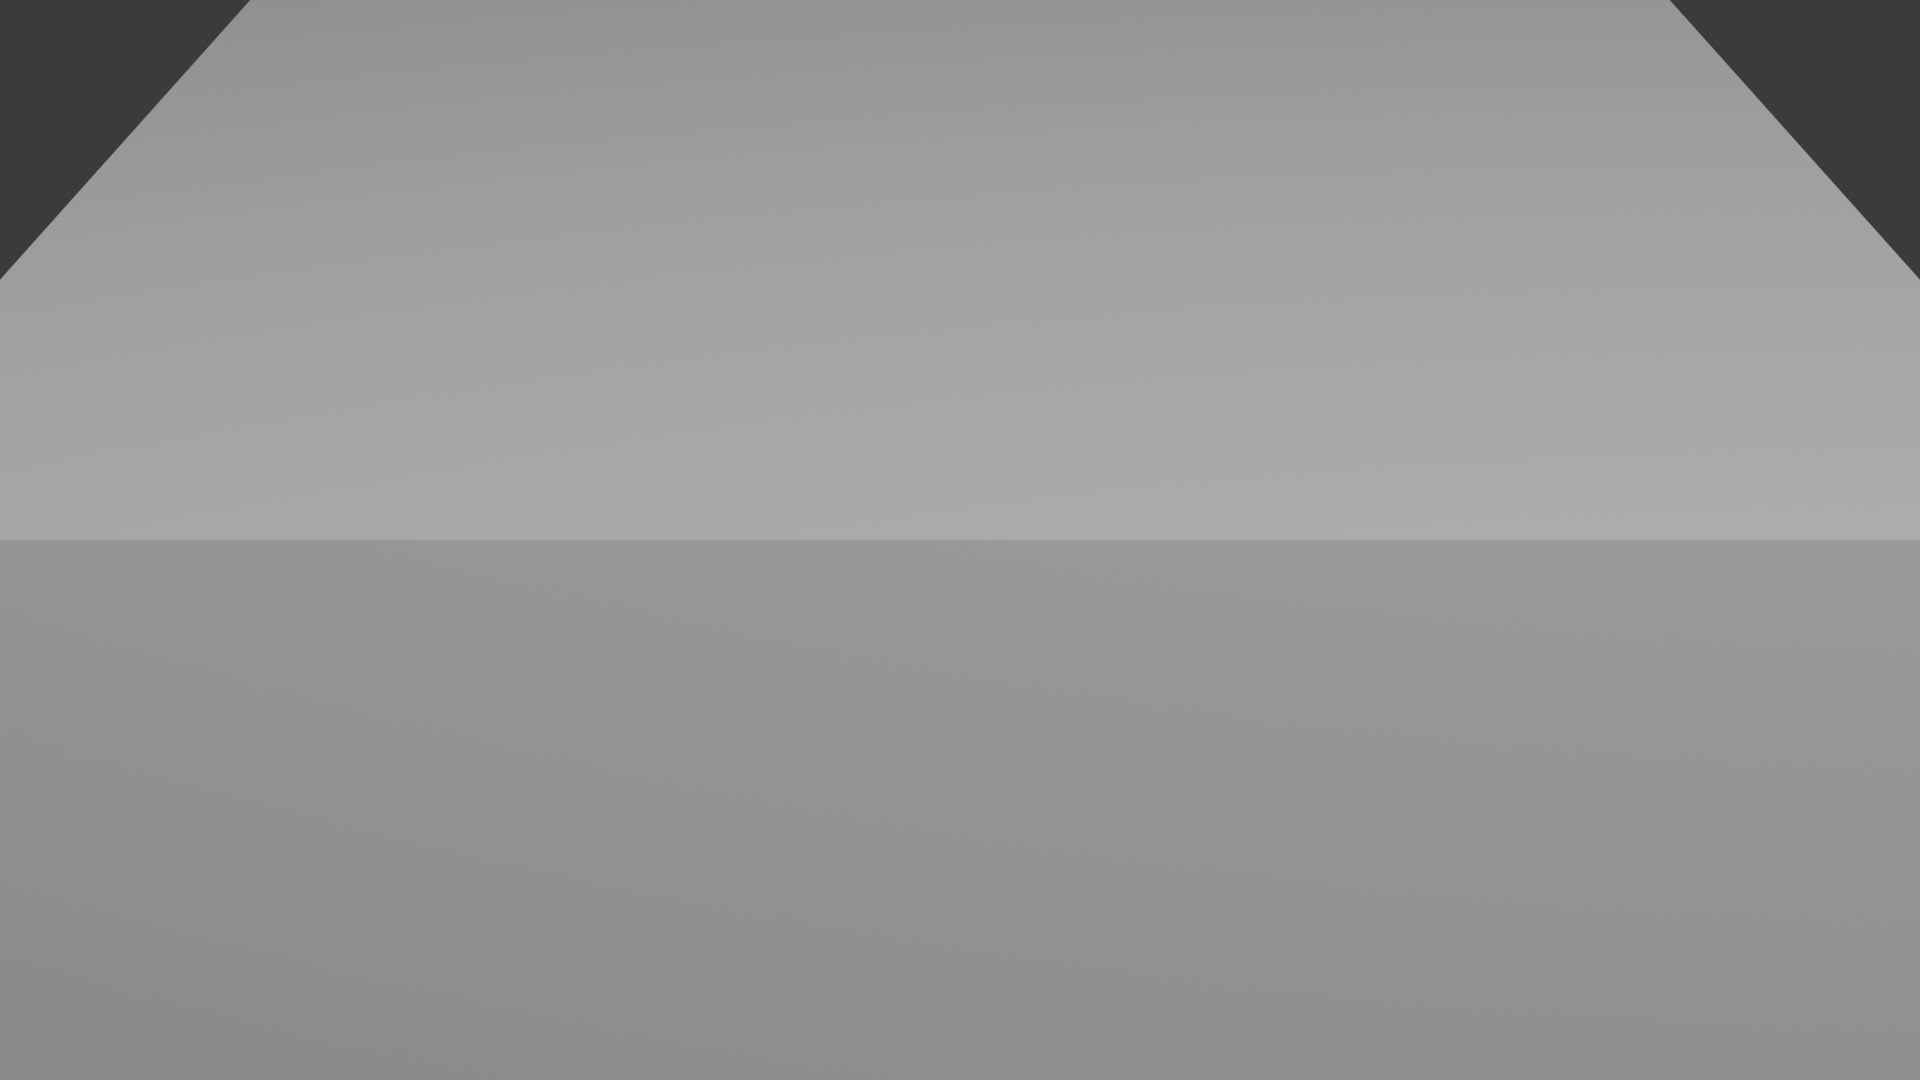